In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import StandardScaler
import mglearn

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

### 군집 알고리즘 비교와 평가

##### 타겟값으로 군집 평가

ARI / NMI : 최적의 값을 가질 때 1이라는 값을 가지고, 군집이 잘 분류되지 않고 무작위로 생성되었을 때 0이라는 값을 가짐 / 0-1 사이의 값을 가짐

** ARI는 음수가 될 수도 있음

In [5]:
from sklearn.metrics.cluster import adjusted_rand_score

In [6]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [8]:
# StandardScalar
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [9]:
# 사용할 알고리즘 모델을 리스트로 만듬

al = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

In [10]:
# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))

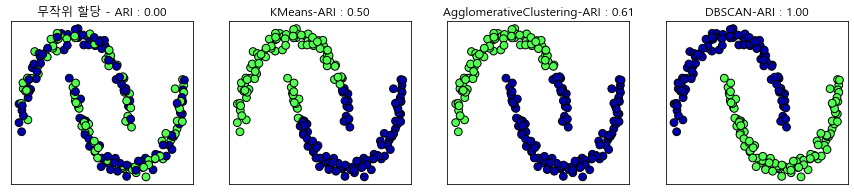

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks':(),'yticks':()})

# 무작위로 할당한 클러스
axes[0].scatter(x_scaled[:,0], x_scaled[:,1], c= random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI : {:.2f}'.format(adjusted_rand_score(y,random_clusters)))

for ax, algorithm in zip(axes[1:], al) :
  clusters= algorithm.fit_predict(x_scaled)
  ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm3, s =60, edgecolors='black')
  ax.set_title('{}-ARI : {:.2f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y,clusters)))

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]

print('정확도 : {:.2f}'.format(accuracy_score(cluster1, cluster2)))
print('ARI : {:.2f}'.format(adjusted_rand_score(cluster1, cluster2)))

정확도 : 0.00
ARI : 1.00


군집에서는 accuracy를 사용하면 안됨

#### 실루엣 지수
- 그렇게 잘 작동하는 지표는 아님
- 클러스터의 밀집정도를 계산해줘서 값이 높을수록 좋고 최대점수 1을 가짐
- 복잡할 때 밀집도를 활용한 평가는 잘 맞지않음
- 1과 -1 사이의 값을 가짐
- -1 의 경우는 잘못 군집을 분류, 0일 때는 군집 중첩, 1일 때는 군집이 잘 분류됨

In [18]:
from sklearn.metrics.cluster import silhouette_score

In [19]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [20]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

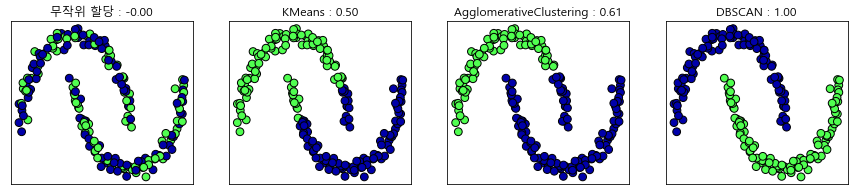

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks':(),'yticks':()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))

axes[0].scatter(x_scaled[:,0], x_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('무작위 할당 : {:.2f}'.format(silhouette_score(x_scaled,random_clusters)))

al = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], al) :
  clusters= algorithm.fit_predict(x_scaled)
  ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
  ax.set_title('{} : {:.2f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y,clusters)))


실루엣 계수가 높다고 하더라도 유의미하다라고 확정적으로 판단할 수는 없다